# Population decline analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pop= pd.read_csv("Total Births, Deaths and Marriages Registered.csv")
pop.head()

,Statistic Label,Quarter,State,UNIT,VALUE
0,Marriages Registered,1960Q1,State,Number,2987.0
1,Marriages Registered,1960Q2,State,Number,3501.0
2,Marriages Registered,1960Q3,State,Number,5900.0
3,Marriages Registered,1960Q4,State,Number,3106.0
4,Marriages Registered,1961Q1,State,Number,2179.0


In [3]:
pop.shape

(4554, 5)

In [4]:
pop.isnull().sum()

Statistic Label       0
Quarter               0
State                 0
UNIT                  0
VALUE              2728
dtype: int64

In [5]:
pop.duplicated().sum()

0

## Note rationale for seeking domain knowledge and findings
In other to explore population declin hypothesis in ireland i consulted with domain knowledgible professionals
Populkation of married couples in ireland does not have a direct corrolation wirth population declin or increase according to domain knowledge. Because not all married people decide to have offsprings, some adopt and some where unable to have offsprings for biological r3easons. Thus is why i decided to drip the marriage column in the popularion projevt. 

In [6]:
pop['Married'] = pop['VALUE'][pop['Statistic Label']=='Marriages Registered']

In [7]:
pop.head()

,Statistic Label,Quarter,State,UNIT,VALUE,Married
0,Marriages Registered,1960Q1,State,Number,2987.0,2987.0
1,Marriages Registered,1960Q2,State,Number,3501.0,3501.0
2,Marriages Registered,1960Q3,State,Number,5900.0,5900.0
3,Marriages Registered,1960Q4,State,Number,3106.0,3106.0
4,Marriages Registered,1961Q1,State,Number,2179.0,2179.0


In [8]:
pop['Statistic Label'].unique()

array(['Marriages Registered',
       'Marriage Rate Registered per 1000 Estimated Population',
       'Deaths Registered',
       'Death Rate Registered per 1000 Estimated Population',
       'Deaths of Infants under 1 Year Registered per 1000 Births',
       'Births Registered',
       'Birth Rate Registered per 1000 Estimated Population',
       'Opposite sex marriages', 'Same sex marriages',
       'Civil partnerships', 'Births registered that were first births',
       'Births registered outside marriage', 'Opposite sex marriage rate',
       'Same sex marriage rate', 'Civil partnership marriage rate',
       'Percentage of first births registered',
       'Percentage of births registered outside marriage',
       'Average age of mothers giving birth'], dtype=object)

As shown above in the pop dataframe(df), there are by deault 4 columns and 4554 rows. However, I used 'unique()' method  on Statistic Label column to see the unique observations in it, this unique values have their corresponding values. In other to explore each unique oberservation and its corresponding values, i need to extract the unique values into columns. Frthermore the values values are observaved for 4 quarters in a year. 

In [9]:
pop['Reg_Death'] = pop['VALUE'][pop['Statistic Label']=='Deaths Registered']

In [10]:
pop['Rate_Death/1000'] = pop['VALUE'][pop['Statistic Label']=='Death Rate Registered per 1000 Estimated Population']

In [11]:
pop['Reg_inf_Death/1000'] = pop['VALUE'][pop['Statistic Label']=='Deaths of Infants under 1 Year Registered per 1000 Births']

In [12]:
pop['Reg_Birth'] = pop['VALUE'][pop['Statistic Label']=='Births Registered']

In [13]:
pop['B_outsideMarriage'] = pop['VALUE'][pop['Statistic Label']=='Percentage of births registered outside marriage']

In [14]:
pop['Mothers_age'] = pop['VALUE'][pop['Statistic Label']== 'Average age of mothers giving birth']

In [15]:
pop['CV_P_M'] = pop['VALUE'][pop['Statistic Label']== 'Civil partnership marriage rate']

In [16]:
pop['Rate_marriage/1000'] = pop['VALUE'][pop['Statistic Label']== 'Marriage Rate Registered per 1000 Estimated Population']

In [17]:
pop.head()

,Statistic Label,Quarter,State,UNIT,VALUE,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
0,Marriages Registered,1960Q1,State,Number,2987.0,2987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Marriages Registered,1960Q2,State,Number,3501.0,3501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Marriages Registered,1960Q3,State,Number,5900.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Marriages Registered,1960Q4,State,Number,3106.0,3106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Marriages Registered,1961Q1,State,Number,2179.0,2179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pop.tail()

,Statistic Label,Quarter,State,UNIT,VALUE,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
4549,Average age of mothers giving birth,2022Q1,State,Number,33.3,NaN,NaN,NaN,NaN,NaN,NaN,33.3,NaN,NaN
4550,Average age of mothers giving birth,2022Q2,State,Number,33.2,NaN,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN
4551,Average age of mothers giving birth,2022Q3,State,Number,33.2,NaN,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN
4552,Average age of mothers giving birth,2022Q4,State,Number,33.2,NaN,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN
4553,Average age of mothers giving birth,2023Q1,State,Number,33.2,NaN,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN


In [19]:
pop['Quarter'].unique()

array(['1960Q1', '1960Q2', '1960Q3', '1960Q4', '1961Q1', '1961Q2',
       '1961Q3', '1961Q4', '1962Q1', '1962Q2', '1962Q3', '1962Q4',
       '1963Q1', '1963Q2', '1963Q3', '1963Q4', '1964Q1', '1964Q2',
       '1964Q3', '1964Q4', '1965Q1', '1965Q2', '1965Q3', '1965Q4',
       '1966Q1', '1966Q2', '1966Q3', '1966Q4', '1967Q1', '1967Q2',
       '1967Q3', '1967Q4', '1968Q1', '1968Q2', '1968Q3', '1968Q4',
       '1969Q1', '1969Q2', '1969Q3', '1969Q4', '1970Q1', '1970Q2',
       '1970Q3', '1970Q4', '1971Q1', '1971Q2', '1971Q3', '1971Q4',
       '1972Q1', '1972Q2', '1972Q3', '1972Q4', '1973Q1', '1973Q2',
       '1973Q3', '1973Q4', '1974Q1', '1974Q2', '1974Q3', '1974Q4',
       '1975Q1', '1975Q2', '1975Q3', '1975Q4', '1976Q1', '1976Q2',
       '1976Q3', '1976Q4', '1977Q1', '1977Q2', '1977Q3', '1977Q4',
       '1978Q1', '1978Q2', '1978Q3', '1978Q4', '1979Q1', '1979Q2',
       '1979Q3', '1979Q4', '1980Q1', '1980Q2', '1980Q3', '1980Q4',
       '1981Q1', '1981Q2', '1981Q3', '1981Q4', '1982Q1', '1982

In [20]:
pop['Quarter'].shape

(4554,)

In [21]:
pop['Reg_Death'].isnull().sum()

4301

In [22]:
pop['Reg_Death'].shape

(4554,)

In [23]:
pop.isnull().sum()

Statistic Label          0
Quarter                  0
State                    0
UNIT                     0
VALUE                 2728
Married               4301
Reg_Death             4301
Rate_Death/1000       4301
Reg_inf_Death/1000    4301
Reg_Birth             4301
B_outsideMarriage     4549
Mothers_age           4549
CV_P_M                4549
Rate_marriage/1000    4301
dtype: int64

As shown above, though we have been able to extract the values of unique o=bservations in the statistic label, we have created understandablly enomous mising values. This is because where there are no observations, pandas will authomatically repkace the rows as missing in other to balance with the shape of the data. 

## Percentage of null values
This operation is used to calculate the proportion of missing values with values that are recorded in other to handle the the null values.

In [24]:
pop.isnull().mean()*100 # Porcentage of missing data

Statistic Label        0.000000
Quarter                0.000000
State                  0.000000
UNIT                   0.000000
VALUE                 59.903382
Married               94.444444
Reg_Death             94.444444
Rate_Death/1000       94.444444
Reg_inf_Death/1000    94.444444
Reg_Birth             94.444444
B_outsideMarriage     99.890206
Mothers_age           99.890206
CV_P_M                99.890206
Rate_marriage/1000    94.444444
dtype: float64

## Data Cleaning
Since i have extracted the needed lable from the 'statistical lable' column, going forward i will drop the 'statistical label' column. 

In [25]:
pop.drop(['Statistic Label'], axis=1, inplace=True)

In [26]:
pop.head()

,Quarter,State,UNIT,VALUE,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
0,1960Q1,State,Number,2987.0,2987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960Q2,State,Number,3501.0,3501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960Q3,State,Number,5900.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960Q4,State,Number,3106.0,3106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961Q1,State,Number,2179.0,2179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pop['UNIT'].unique()

array(['Number', '%'], dtype=object)

In [28]:
pop['State'].unique()

array(['State'], dtype=object)

In [29]:
pop.drop(['State'], axis=1, inplace=True)

In [30]:
pop.head()

,Quarter,UNIT,VALUE,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
0,1960Q1,Number,2987.0,2987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960Q2,Number,3501.0,3501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960Q3,Number,5900.0,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960Q4,Number,3106.0,3106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961Q1,Number,2179.0,2179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
pop.describe()

,VALUE,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
count,1826.000000,253.000000,253.000000,253.000000,253.000000,253.000000,5.000000,5.000000,5.0,253.000000
mean,3977.795016,4810.426877,7897.806324,8.822134,10.607905,15616.932806,42.880000,33.220000,0.0,5.309486
std,5587.558500,1804.964835,968.524187,2.179118,8.213076,1960.231925,1.136662,0.044721,0.0,2.081377
min,0.000000,304.000000,6113.000000,5.300000,2.100000,10947.000000,41.200000,33.200000,0.0,0.200000
25%,7.825000,3501.000000,7164.000000,7.100000,4.100000,14211.000000,42.600000,33.200000,0.0,4.100000
50%,20.050000,4539.000000,7650.000000,8.500000,7.100000,15612.000000,42.800000,33.200000,0.0,4.900000
75%,7348.250000,5707.000000,8472.000000,10.400000,16.000000,17128.000000,43.600000,33.200000,0.0,6.600000
max,19950.000000,8949.000000,11883.000000,17.100000,35.700000,19950.000000,44.200000,33.300000,0.0,10.300000


## Handling Missing values in extracted feature 
Going by the information available through using the isnull and sum methods in pandas, and the proportionality coalculation operation, output shows that the extracted labels columns have a significant missing value, because understandable the values has most likely been extracted under another column.
Over 90% of the values in these lable features are missing values. To be able to choose the right way to deal with this null values we must consider the decriptive statistical analysis of this features. With '.describe()' method we were able to see that all the variables are significantly skwed. Some varaiables are left skewed, while some are right skewed meaning that in some variables, the mean is greater than the median while in some the mean is lesser than the median. 
### Exploring different method of handling missing values
#### Input Method consideration
Whiles considering the most effective method to input the null values with, it is worth noting that authors have argurged there is no method of inputation used to replace null value that would not introduce some sort of bias in our data, it is always a question of what is the most efficient method based of the information available in our data ***(data cleaning note, 2023)***.
***Using Statistical values:*** such as (mean and median) is an example of a way of replasing missing values ***(data cleaning not, 2023)***. (Gawali, 2021) reported that mean values can be used to replace numerical data when the data distributing is not skewed. Considering the result of pop df descriptive statistics, result shows that feautures are skewed so mean would not be appropriate. Median on the other hand is more robust, not sensitive to outliers and is appropriate to used when the data we are trying to fill is skewed (Gawali, 2021). 
This makes logical sense considering mean is calculated by averaging an entire distribution, which would include extreme value if present. If mean is used in this case we would be introducing a high bias into our data. Mathematically, median is the middle value or average of middle values of a distribution, it does not take into consideration the extreme values on the left or right of a distribution hence not impacting the truness of the data too much as the value that would most likely be imputed are still within 3 standard deviations to the right or left of the median (95%) of sample. 

***Interpolation:***(code-mentor.ai, 2023) defined interpolation as a technique used to estimate missing values based on the values of neighboring data points. Based on this definition it seems to me using interpolation method is introducing a lot of biase into out data. The population obsevations are not expected to be based on a pattern known to us i.e they are random numbers, using interpolation regardless which ever method or direction specified in the sythax will force the pattern to follow a direction, heance introduction biase. 
#### Drop method
The extracted columns has too many null-values, our goal is to try and correct the missing values while still trying to retain the truness of the data to a resanable extent. (Eddie_4072, 2021), reported that in extreme case when the ratio of null value is significantly higher than the ration of actual recorded observation, it is safer to drop the variable.
However, the null-values we have in our data was created by during implementation. Going back to the early EDA as shown in fig.2 there where 2728 null values recorded in pop before we extracted the lables and there corresponding values from the statistics-label feuture. Haven extracted the recoreded corresponding values of lables from the statistics-lable, we dont need the values column anymore, so we will drop it. Furthermore the artificially created NAN's rows will also be drop using the 'dropna' method.  
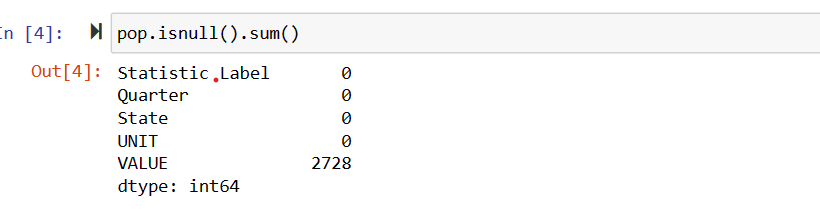
fig.2
#### Conclusion
The entire values column will be dropped, and the NAN rows in the lable features will also be dropped based on justification provided above.

In [32]:
pop.drop(['VALUE'], axis=1, inplace= True)

In [33]:
pop.head()

,Quarter,UNIT,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000
0,1960Q1,Number,2987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960Q2,Number,3501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960Q3,Number,5900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960Q4,Number,3106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961Q1,Number,2179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
pop_clean= pop.dropna()
pop_clean.head()

,Quarter,UNIT,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,B_outsideMarriage,Mothers_age,CV_P_M,Rate_marriage/1000


In [35]:
pop_clean.shape

(0, 11)

## Note 
Loook at the variables thst have high counts and drop them. This is because the o=bsservations are very small and they are causing all the data to drop. 


As shown after dropping the NAN the all 4554 rows was droped why? 
If we take a step back, what does 'dropna()' method do?: The dropna method removes all rows containing any NaN observation. Our Percentage calculation as shown in fig.3 shows that after the extraction of our lables from the statistical-label variable, ['B_outsideMarriage','Mothers_age','CV_P_M'] had a significant percentage on NaN compared to actual observations, calculation shows that 99.8% of the entire observation is missing, hence the reason why other variables with actual observations as shown in fig.4 where dropped. 

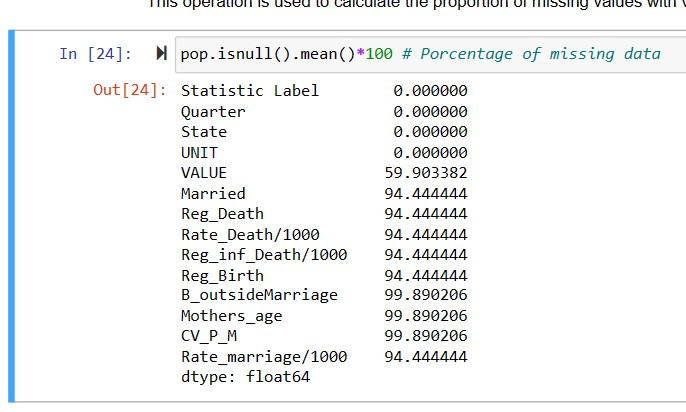  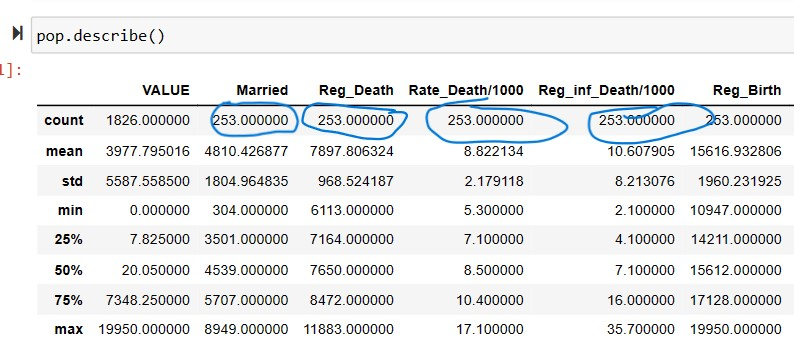

fig.3                                    fig.4

## Plan going forward
To fix this problem, (Eddie_4072, 2021) reported that in extreme case when the ratio of null value is significantly higher than the ration of actual recorded observation, it is safer to drop the variable. As we have in the ['B_outsideMarriage','Mothers_age','CV_P_M'] variables, where approximately 100% of the observation is NaN, i will drop this 3 variables to be able to work with other variables. Also according to domain professionals, the ['B_outsideMarriage','Mothers_age','CV_P_M'] are not names as indictors for checking the population status of any country, thus furthwr justifies why it;s good practice to drop thes variables. 


In [36]:
# Drooping ['B_outsideMarriage','Mothers_age','CV_P_M'] variables
pop.drop(['B_outsideMarriage','Mothers_age','CV_P_M'], axis=1, inplace=True)

In [38]:
pop.head()

,Quarter,UNIT,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,Rate_marriage/1000
0,1960Q1,Number,2987.0,NaN,NaN,NaN,NaN,NaN
1,1960Q2,Number,3501.0,NaN,NaN,NaN,NaN,NaN
2,1960Q3,Number,5900.0,NaN,NaN,NaN,NaN,NaN
3,1960Q4,Number,3106.0,NaN,NaN,NaN,NaN,NaN
4,1961Q1,Number,2179.0,NaN,NaN,NaN,NaN,NaN


In [39]:
pop.shape

(4554, 8)

In [42]:
# Now droping the the NaN
pop_dro= pop.dropna()
pop_dro.head()

,Quarter,UNIT,Married,Reg_Death,Rate_Death/1000,Reg_inf_Death/1000,Reg_Birth,Rate_marriage/1000


In [ ]:
pop

#pup.shape
## Use the EDA note for EDA plot 
## Use Cleaning note for cleaning 
## used ML not for machiene learning